In [85]:
# Import Pandas, Matplotlib, NumPy
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [86]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [87]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [88]:
from citipy import citipy

In [89]:
# Create a list to hold the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, we add it to the cities list
    if city not in cities:
       cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

618

In [90]:
# Import the datetime module from the datetime library
from config import weather_api_key
from datetime import datetime
import requests
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=b6fd0af6211daf19d860028bccc0a5a3


In [91]:
# Create an empty list to hold the weather data
city_data=[]

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print(".............................")

# Create counters
record_count = 1
set_count = 1

# Loop thu all the cities in the list:
for i, city in enumerate(cities):
    # Group cities in set of 50 for logging
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count}of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
         # Append the city information into city_data list.
        city_data.append({"City": city.title(),"Lat": city_lat,"Lng": city_lng, "Max Temp": city_max_temp,
    "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind, 
    "Country": city_country, "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
.............................
Processing Record 1of Set 1 | vao
Processing Record 2of Set 1 | khatanga
Processing Record 3of Set 1 | dargaville
Processing Record 4of Set 1 | tucuman
Processing Record 5of Set 1 | eugene
Processing Record 6of Set 1 | pereslavl-zalesskiy
Processing Record 7of Set 1 | pangnirtung
Processing Record 8of Set 1 | busselton
Processing Record 9of Set 1 | necochea
Processing Record 10of Set 1 | rikitea
Processing Record 11of Set 1 | hobart
Processing Record 12of Set 1 | iralaya
Processing Record 13of Set 1 | louisbourg
City not found. Skipping...
Processing Record 14of Set 1 | bekescsaba
Processing Record 15of Set 1 | praia da vitoria
Processing Record 16of Set 1 | ponta do sol
Processing Record 17of Set 1 | vila vicosa
Processing Record 18of Set 1 | norman wells
Processing Record 19of Set 1 | bredasdorp
Processing Record 20of Set 1 | miyako
Processing Record 21of Set 1 | albany
Processing Record 22of Set 1 | tuktoyaktuk
Processing R

Processing Record 45of Set 4 | faanui
Processing Record 46of Set 4 | qaqortoq
Processing Record 47of Set 4 | praia
Processing Record 48of Set 4 | sinnamary
Processing Record 49of Set 4 | bichena
Processing Record 50of Set 4 | gunjur
Processing Record 1of Set 5 | ballina
Processing Record 2of Set 5 | kurmanayevka
Processing Record 3of Set 5 | lazaro cardenas
Processing Record 4of Set 5 | pisco
Processing Record 5of Set 5 | port blair
Processing Record 6of Set 5 | iwanai
Processing Record 7of Set 5 | terrace bay
Processing Record 8of Set 5 | birin
Processing Record 9of Set 5 | castellarano
Processing Record 10of Set 5 | banjar
Processing Record 11of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 12of Set 5 | doctor juan leon mallorquin
Processing Record 13of Set 5 | middelburg
Processing Record 14of Set 5 | quatre cocos
Processing Record 15of Set 5 | luderitz
Processing Record 16of Set 5 | kavaratti
Processing Record 17of Set 5 | avera
Processing Record 18of Set 5 | 

Processing Record 37of Set 8 | san luis
Processing Record 38of Set 8 | nurota
Processing Record 39of Set 8 | jacksonville
Processing Record 40of Set 8 | noumea
Processing Record 41of Set 8 | buchmany
Processing Record 42of Set 8 | wawa
Processing Record 43of Set 8 | buala
Processing Record 44of Set 8 | plettenberg bay
Processing Record 45of Set 8 | nouadhibou
Processing Record 46of Set 8 | coahuayana
Processing Record 47of Set 8 | la ronge
Processing Record 48of Set 8 | oytal
Processing Record 49of Set 8 | kodiak
Processing Record 50of Set 8 | lagoa
Processing Record 1of Set 9 | tevriz
Processing Record 2of Set 9 | mergui
City not found. Skipping...
Processing Record 3of Set 9 | monroe
Processing Record 4of Set 9 | huescar
Processing Record 5of Set 9 | ingham
Processing Record 6of Set 9 | vilyuysk
Processing Record 7of Set 9 | dwarka
Processing Record 8of Set 9 | villa del rosario
Processing Record 9of Set 9 | sao gabriel da cachoeira
Processing Record 10of Set 9 | college
Processing R

City not found. Skipping...
Processing Record 26of Set 12 | halle
Processing Record 27of Set 12 | north bend
Processing Record 28of Set 12 | musoma
Processing Record 29of Set 12 | daphne
Processing Record 30of Set 12 | medicine hat
Processing Record 31of Set 12 | ternate
Processing Record 32of Set 12 | dalby
Processing Record 33of Set 12 | okakarara
Processing Record 34of Set 12 | fatsa
Processing Record 35of Set 12 | yeppoon
Processing Record 36of Set 12 | yurimaguas
Processing Record 37of Set 12 | asau
Processing Record 38of Set 12 | arica
Processing Record 39of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 40of Set 12 | banmo
City not found. Skipping...
Processing Record 41of Set 12 | wuwei
Processing Record 42of Set 12 | halalo
City not found. Skipping...
Processing Record 43of Set 12 | ballyshannon
Processing Record 44of Set 12 | rehoboth
Processing Record 45of Set 12 | barroualie
City not found. Skipping...
Processing Record 46of Set 12 | jonesboro
Processing 

In [92]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vao,-22.6667,167.4833,68.29,59,17,10.04,NC,2021-09-25 22:29:14
1,Khatanga,71.9667,102.5000,28.71,92,92,10.07,RU,2021-09-25 22:28:23
2,Dargaville,-35.9333,173.8833,58.24,89,59,7.27,NZ,2021-09-25 22:29:14
3,Tucuman,-26.8241,-65.2226,86.00,21,0,14.97,AR,2021-09-25 22:29:15
4,Eugene,44.0521,-123.0867,84.38,40,20,1.01,US,2021-09-25 22:28:50
5,Pereslavl-Zalesskiy,56.7393,38.8563,46.99,98,100,5.86,RU,2021-09-25 22:29:15
6,Pangnirtung,66.1451,-65.7125,35.58,55,100,2.51,CA,2021-09-25 22:29:16
7,Busselton,-33.6500,115.3333,51.08,90,67,4.21,AU,2021-09-25 22:29:16
8,Necochea,-38.5473,-58.7368,61.03,83,0,10.94,AR,2021-09-25 22:29:16
9,Rikitea,-23.1203,-134.9692,73.90,76,58,14.74,PF,2021-09-25 22:28:22


In [93]:
# Reorder columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
reorder_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder_columns]  
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vao,NC,2021-09-25 22:29:14,-22.6667,167.4833,68.29,59,17,10.04
1,Khatanga,RU,2021-09-25 22:28:23,71.9667,102.5000,28.71,92,92,10.07
2,Dargaville,NZ,2021-09-25 22:29:14,-35.9333,173.8833,58.24,89,59,7.27
3,Tucuman,AR,2021-09-25 22:29:15,-26.8241,-65.2226,86.00,21,0,14.97
4,Eugene,US,2021-09-25 22:28:50,44.0521,-123.0867,84.38,40,20,1.01


In [103]:
# Create the output file CSV
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City ID")

In [104]:
# Extract the relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

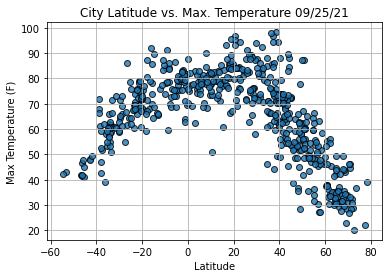

In [105]:
# Import time module
import time

# Build the scatter plot for lat vs max temps
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max. Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

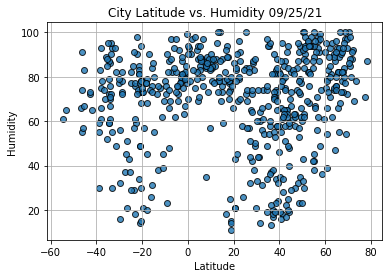

In [106]:
# Build the scatter plot for lat vs max temps
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

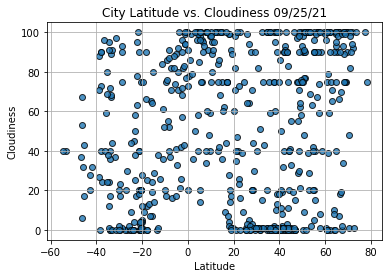

In [107]:
# Build the scatter plot for lat vs max temps
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

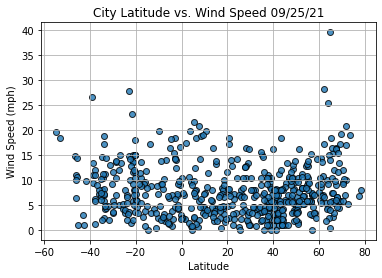

In [108]:
# Build the scatter plot for lat vs max temps
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [152]:
# Import linear regression from the SciPy stats module
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print (f"The r-value is: {r_value:.3f}")
# there will be no output until we call the function with five parameters.

In [153]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

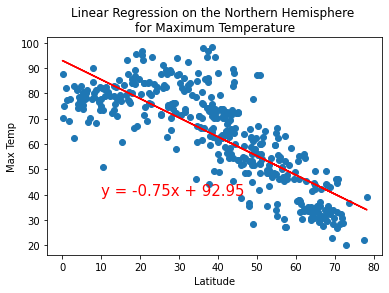

The r-value is: -0.791


In [154]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

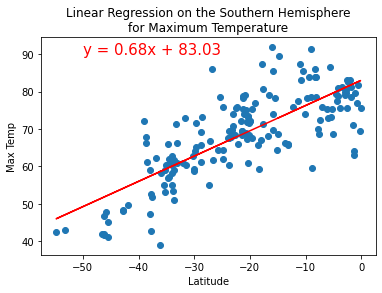

The r-value is: 0.776


In [155]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere\nfor Maximum Temperature","Max Temp", (-50, 90))

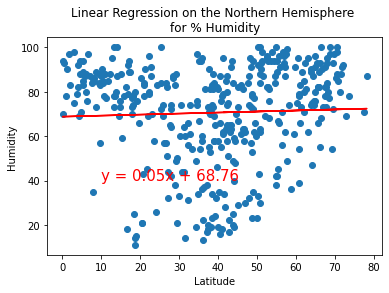

The r-value is: 0.041


In [156]:
# Find the Correlation Between Latitude & Humidity for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor % Humidity', 'Humidity',(10,40))

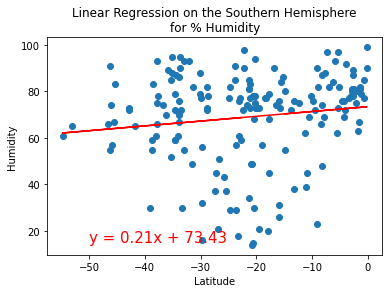

The r-value is: 0.137


In [162]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere\nfor % Humidity","Humidity", (-50, 15))
                       

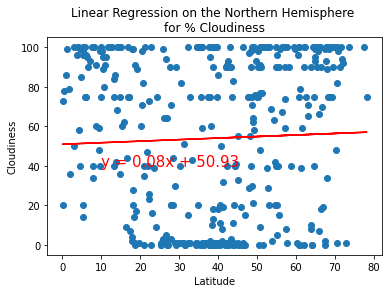

The r-value is: 0.038


In [164]:
# Find the Correlation Between Latitude & Cloudiness for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 'Cloudiness',(10,40)) 

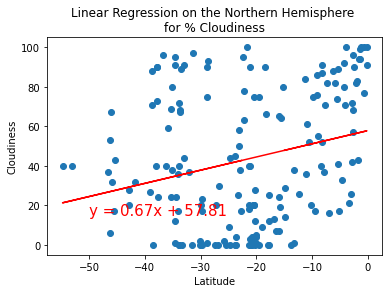

The r-value is: 0.257


In [165]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 'Cloudiness',(-50,15)) 

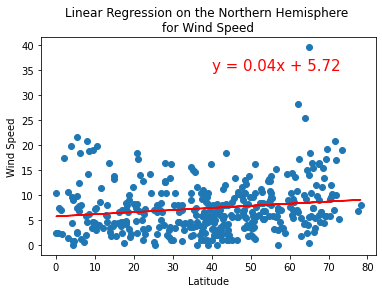

The r-value is: 0.163


In [170]:
# Find the Correlation Between Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

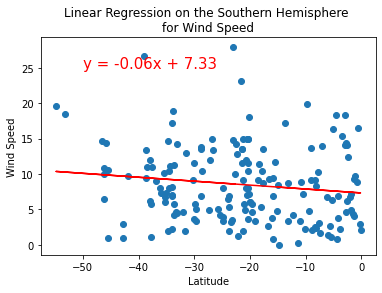

The r-value is: -0.136


In [171]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,25))